In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [2]:
#pre-processing
data = pd.read_csv("C:\\Shill Bidding Dataset.csv")

data = data.drop(["Record_ID", "Auction_ID", "Bidder_ID", "Class"], axis=1) #刪除ID特徵&類別

In [3]:
#正規化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)
scaled_features = scaler.transform(data)
data = pd.DataFrame(scaled_features, columns=data.columns[:])

In [4]:
#降維
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data = pca.fit_transform(data)

K-means分群時間: 0.09628050000000021 秒
K-means之Silhouette Coefficient: 0.4540565052760463
K-means之Calinski Harabasz Score: 5968.60636038453


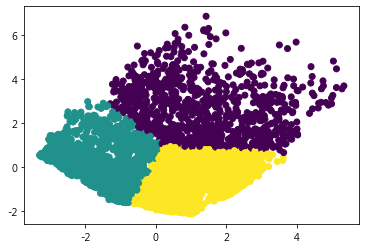

In [5]:
#K-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

t1 = time.perf_counter()
Kmeans = KMeans(n_clusters=3)
Kmeans.fit(data)
t2 = time.perf_counter()

print("K-means分群時間:", t2-t1, "秒")
print("K-means之Silhouette Coefficient:", silhouette_score(data, Kmeans.labels_))
print("K-means之Calinski Harabasz Score:", calinski_harabasz_score(data, Kmeans.labels_))

plt.scatter(data[:,0], data[:,1], c=Kmeans.predict(data))

階層式分群分群時間: 1.1021912 秒
階層式分群之Silhouette Coefficient: 0.3221377099455524
階層式分群之Calinski Harabasz Score: 3583.353817246104


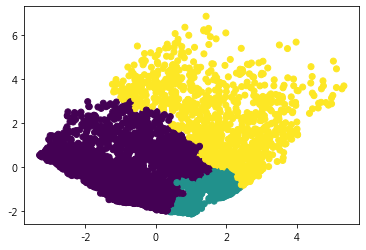

In [6]:
#階層式分群(single link)
import scipy.cluster.hierarchy as sch

t1 = time.perf_counter()
dis = sch.linkage(data ,metric="euclidean", method="ward") #metric:距離的計算方式, method:群與群之間的計算方式
clusters = sch.fcluster(dis, 3, criterion="maxclust")
t2 = time.perf_counter()

print("階層式分群分群時間:", t2-t1, "秒")
print("階層式分群之Silhouette Coefficient:", silhouette_score(data, clusters))
print("階層式分群之Calinski Harabasz Score:", calinski_harabasz_score(data, clusters))

plt.scatter(data[:,0], data[:,1], c=clusters)

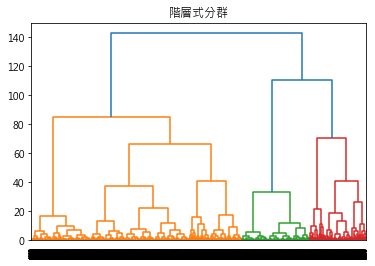

In [7]:
#階層式分群之階層樹

sch.dendrogram(dis)
plt.title("階層式分群")
plt.show()

DBSCAN分群時間: 0.11245239999999512 秒
DBSCAN之Silhouette Coefficient: 0.490198134736952
DBSCAN之Calinski Harabasz Score: 139.28751562513406


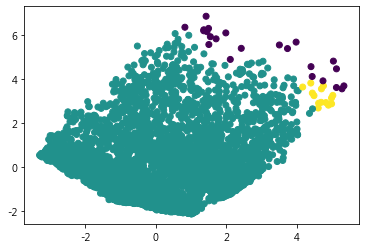

In [8]:
#DBSCAN
from sklearn.cluster import DBSCAN

t1 = time.perf_counter()
DBSCAN = DBSCAN(eps=0.5, min_samples=10).fit(data)
t2 = time.perf_counter()

print("DBSCAN分群時間:", t2-t1, "秒")
print("DBSCAN之Silhouette Coefficient:", silhouette_score(data, DBSCAN.labels_))
print("DBSCAN之Calinski Harabasz Score:", calinski_harabasz_score(data, DBSCAN.labels_))

plt.scatter(data[:,0], data[:,1], c=DBSCAN.labels_)